In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import tree

#prepare data
df = pd.read_csv("./YearPredictionMSD.txt", header = None, delimiter = ",")


In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,2001,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,2001,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,2001,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,2007,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


In [4]:
#Split data set  
X = df.loc[:,1:]
y = df.loc[:,0]

In [9]:
#Fit all of the target values into two classes
y2 = []
for i in range(len(y)):
    if(y[i] >= 2000):
        y2.append(1)
    else:
        y2.append(0)

In [10]:
#Split in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.70, random_state=5) #70% training  30% test

In [12]:
#train random forest
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

#Predict probabilities
y_prob_pred = clf.predict_proba(X_test)

#Predict in all data
y_prob_pred = clf.predict_proba(X)

y_prob_pred2 = []
for i in range(len(y_prob_pred)):
    if(y_prob_pred[i][0] <= 5):
        y_prob_pred2.append(0)
    else:
        y_prob_pred2.append(1)

#Test
print("Accuracy:", acc(y_prob_pred2, y2))


Accuracy: 0.4015659412626493


In [13]:
#Create new dataset

#fit in bins
ds = []
bins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
yt = bins.fit_transform(y_prob_pred)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, yt, test_size=0.70, random_state=5) #70% training  30% test

In [14]:
#Generate tree for distillation
tree = tree.DecisionTreeClassifier()
#Train using new dataset
tree.fit(X_train_new, y_train_new)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
#Predict from the original data set
y_pred_tree_fin2 = []
y_pred_tree_fin = tree.predict(X)
#Return bins to two classes
y_pred_tree2 = []
for i in range(len(y_pred_tree_fin)):
    if(y_pred_tree_fin[i][0] >= 5):
        y_pred_tree_fin2.append(0)
    else:
        y_pred_tree_fin2.append(1)

In [17]:
#Test
print("Accuracy:", acc(y_pred_tree_fin2, y2))

Accuracy: 0.7456383587693681


In [18]:
#Get scores
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score)

print(metrics.classification_report(y2,y_pred_tree_fin2))
print(cohen_kappa_score(y2, y_pred_tree_fin2))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69    206945
           1       0.79      0.78      0.79    308400

   micro avg       0.75      0.75      0.75    515345
   macro avg       0.74      0.74      0.74    515345
weighted avg       0.75      0.75      0.75    515345

0.4723738471328336


In [19]:
#Generate tree for normal training
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#Train with original data
tree2 = tree.DecisionTreeClassifier()
tree2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
#Predict from original dataset
y_pred_tree2 = tree2.predict(X)

In [22]:
#Test
#Get scores
print("Accuracy:", acc(y_pred_tree2, y2))
print(metrics.classification_report(y2,y_pred_tree2))
print("Kappa Score: ",cohen_kappa_score(y2, y_pred_tree2))

Accuracy: 0.7522378212653659
              precision    recall  f1-score   support

           0       0.69      0.70      0.69    206945
           1       0.80      0.79      0.79    308400

   micro avg       0.75      0.75      0.75    515345
   macro avg       0.74      0.74      0.74    515345
weighted avg       0.75      0.75      0.75    515345

Kappa Score:  0.4858965912990243


([array([39265.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0., 83423.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0., 74202.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         76774.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0., 69529.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0., 49877.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
         35074.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0.,     0.,     0.,     0., 37116.,     0.,
             0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.,     0., 38650.,     0.,   

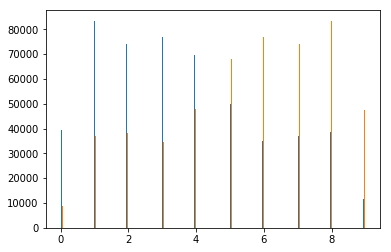

In [23]:
#Histogram of bins
import matplotlib.pyplot as plt
plt.hist(yt, bins='auto')